In [2]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [4]:
print(pd.__version__)
print(np.__version__)
print(hmmlearn.__version__)

2.2.3
1.26.4
0.3.2


## Look at the data

In [5]:
nile = pd.read_csv("/kaggle/input/nile-data/Nile.csv", index_col = 0)

In [6]:
nile.head()

,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


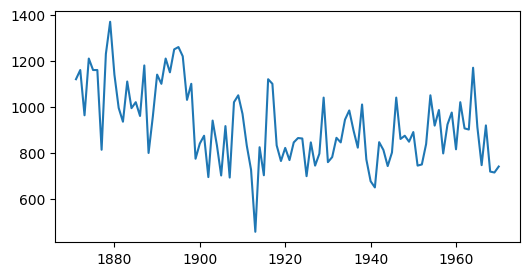

In [7]:
plt.plot(nile.year, nile.val)

## Let's take a look at the hmmlearn API

In [8]:
vals = np.expand_dims(nile.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [9]:
np.bincount(hidden_states)

array([72, 28])

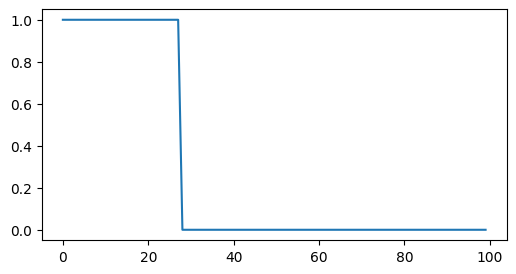

In [10]:
plt.plot(hidden_states)

## Exercise: how can we package this more conveniently?

In [11]:

def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     # re-order parameters in ascending order of mean of underlying distribution
#     idx      = np.argsort(mus)
#     mus      = mus[idx]
#     sigmas   = sigmas[idx]
#     transmat = transmat[idx, :][:, idx]
    
#     state_dict = {}
#     states = [i for i in range(n_states)]
#     for i in idx:
#         state_dict[i] = states[idx[i]]
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [12]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 2)

[1097.15260321  850.75603173]
[133.74755283 124.44598109]


## Exercise: how might we be able to plot this more sensibly?

In [13]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

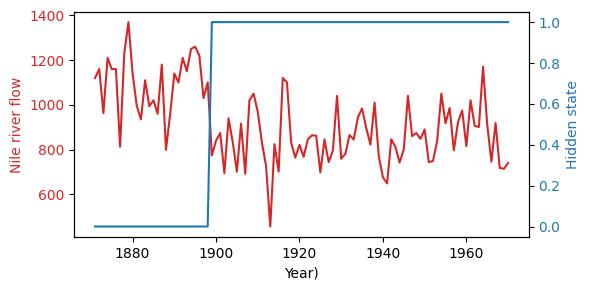

In [14]:
plot_states(nile.val, hidden_states, nile.year)

## Exercise: can we improve on the analysis above?

### Cut off the 'special' region

In [15]:
np.where(hidden_states == 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

In [16]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)


[1167.3678038   850.36185826 1043.28894914]
[ 57.09881018 124.14409014 148.91383775]


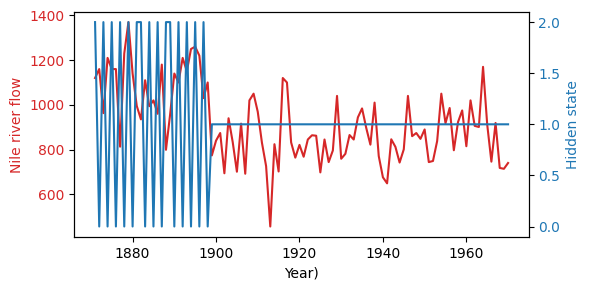

In [17]:
plot_states(nile.val, hidden_states, nile.year)

In [18]:
mus

array([1167.3678038 ,  850.36185826, 1043.28894914])

In [19]:
np.set_printoptions(precision = 3, suppress = True)

In [20]:
transmat

array([[0.   , 0.082, 0.918],
       [0.   , 1.   , 0.   ],
       [0.786, 0.   , 0.214]])

In [21]:
mus

array([1167.368,  850.362, 1043.289])

## Exercise: generate new synthetic data from the model and then fit it with a fresh HMM model

#### Easy to sample from an existing HMM model

In [22]:
res = np.squeeze(model.sample(1000)[0])

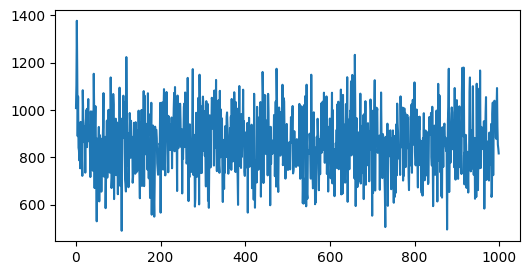

In [23]:
plt.plot(res)

#### Then refit

In [24]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

[806.512 914.284 790.089]
[109.654 117.844 110.205]


In [25]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time)')
    ax1.set_ylabel('Value',        color=color)
    ax1.plot(ts_vals,              color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,        color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

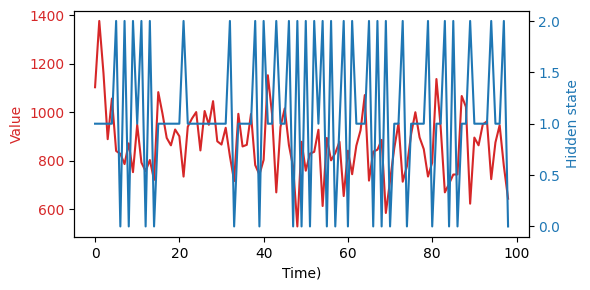

In [26]:
plot_states_no_time(res[1:100], hidden_states[1:100])

In [27]:
transmat

array([[0.026, 0.459, 0.515],
       [0.035, 0.595, 0.369],
       [0.546, 0.453, 0.   ]])